# **Install, Import and Initialize Libraries**

In [1]:
# Install SISTER
# %%capture
!pip install sister

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 59.8 MB/s eta 0:00:00
  Using cached pybind11-2.10.4-py3-none-any.whl (222 kB)
  Created wheel for sister: filename=sister-0.1.10-py3-none-any.whl size=5396 sha256=c524986647b61415c81100573b8a2fff436e30490e3ad41893fe3949c6c0b023
  Stored in directory: /root/.cache/pip/wheels/ca/f7/2f/06675505d67efbb8c9355a68c97f02c2e8b0267469ee62bc6d
  Created wheel for fasttext: filename=fasttext-0.9.2-cp39-cp39-linux_x86_64.whl size=4395478 sha256=78be3ff475e230f551ddaa437b74384d5f9b516c8edb8efa1310a3314bbdcc2a
  Stored in directory: /root/.cache/pip/wheels/64/57/bc/1741406019061d5664914b070bd3e71f6244648732bc96109e
Successfully built sister fasttext


In [2]:
#Install Embedder
%%time
import gensim
import gensim.downloader as api
embedder = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded
CPU times: user 7min 6s, sys: 40.1 s, total: 7min 46s
Wall time: 8min 58s


In [3]:
# Install emoji conversion library
!pip install emot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.5/61.5 kB 6.2 MB/s eta 0:00:00


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os.path
from os import path
from sklearn.utils import shuffle
import time
import warnings
warnings.filterwarnings('ignore')
import re
import pickle
from emot.emo_unicode import UNICODE_EMOJI # For emojis
from emot.emo_unicode import EMOTICONS_EMO # For EMOTICONS
import itertools
from collections import Counter
#Text processing
import string
import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras import layers
from keras.layers import Dense, Dropout,LSTM, Bidirectional,Flatten,Conv1D,MaxPooling1D
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.models import load_model
from keras.utils.vis_utils import plot_model
from keras.utils.np_utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [5]:
#Download NLTK library
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

# **Read Data**

In [6]:
df=pd.read_excel('ds1_ds2_ds3_unique_psufor.xlsx')

In [7]:
df.head()

,NonFuncationalRequirment,UserReviewDescription
0,Performance,The video player on the App fails to load the ...
1,Functional Requirements,The app is suddenly full of bugs since the las...
2,Functional Requirements,Huge Issue: On multiple choice answers the ans...
3,Security,Not able to log in after update. Our college m...
4,Security,Great value. Cannot find better information fo...


# **Exploratory Data Analyis**



In [8]:
df.shape

(2622, 2)

In [9]:
list(df.columns)

['NonFuncationalRequirment', 'UserReviewDescription']

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2622 entries, 0 to 2621
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   NonFuncationalRequirment  2622 non-null   object
 1   UserReviewDescription     2622 non-null   object
dtypes: object(2)
memory usage: 41.1+ KB


In [11]:
df.describe()

,NonFuncationalRequirment,UserReviewDescription
count,2622,2622
unique,6,2570
top,Usability,Hate the newer version.The auto- talking is ob...
freq,796,2


In [12]:
# Count of Null columnwise
print(df.isnull().sum())

NonFuncationalRequirment    0
UserReviewDescription       0
dtype: int64


There are no NULL values in the data

In [13]:
# Select required coulmns
data=df[['UserReviewDescription','NonFuncationalRequirment']]

In [14]:
data.head()

,UserReviewDescription,NonFuncationalRequirment
0,The video player on the App fails to load the ...,Performance
1,The app is suddenly full of bugs since the las...,Functional Requirements
2,Huge Issue: On multiple choice answers the ans...,Functional Requirements
3,Not able to log in after update. Our college m...,Security
4,Great value. Cannot find better information fo...,Security


In [15]:
data.shape

(2622, 2)

In [16]:
# Unique values for non functional requirements
data['NonFuncationalRequirment'].unique()

array(['Performance', 'Functional Requirements', 'Security', 'Usability',
       'Reliability', 'Others'], dtype=object)

In [17]:
category_requirement=data['NonFuncationalRequirment'].value_counts()
print(category_requirement)

Usability                  796
Performance                689
Reliability                430
Others                     315
Functional Requirements    256
Security                   136
Name: NonFuncationalRequirment, dtype: int64


<Axes: >

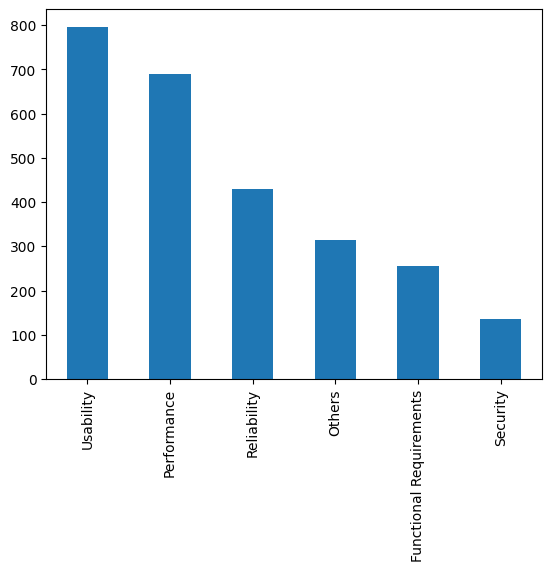

In [18]:
#Data Visualization
category_requirement.plot(kind="bar", fontsize=10)

In [19]:
data.shape

(2622, 2)

Class is imbalanced

# **Text Pre-Processing**

In [20]:
# Remove punctuations, non alphabetic characters, lower and stop words 
def text_process(review):
      
      stops = set(stopwords.words('english'))                         # Defining stop words
          
      review = re.sub('[\n\t\r]+',' ',review)                         # Remove linebreak, tab, return
      review = review.lower()                                         # Convert to lower case
      review = re.sub('[0-9]',' ',review)                             #remove numbers
      modified_sentence=""
      words = nltk.word_tokenize(review)                              # Word Tokenization 
      words_without_stops = [w for w in words if not w in stops]
      modified_sentence =  ' '.join(words_without_stops)
      modified_sentence=modified_sentence.strip()
      review = re.sub('['+string.punctuation+']+','',\
                  modified_sentence)                                  # Remove Punctuations     
      review = re.sub('\s+\s+',' ',review) 
      review=review.strip()                            
      return(review)

In [21]:
# Emoji conversion
def emoji_conversion(review):
    for emot in UNICODE_EMOJI:
        review = review.replace(emot, "_".join(UNICODE_EMOJI[emot].replace(",","").replace(":","").split()))
    return review

In [22]:
# Normalization
lemmatizer = WordNetLemmatizer()

# Lemmatization
def lemmatize(review):
    words = nltk.word_tokenize(review)
    review_lemmatized = ' '.join([lemmatizer.lemmatize(word) for word in words])
    return review_lemmatized

In [23]:
def getCleanReview(review): 
    clean_review = ''
    review = review.strip()
    review = " ".join(review.split())
    review = text_process(review)
    review = emoji_conversion(review)
    review = lemmatize(review)
    clean_review = review
    return clean_review

In [24]:
from sister.tokenizers import Tokenizer, SimpleTokenizer
tokenizer = SimpleTokenizer()

def w2v_embedder(review):
    vectors = []
    tokens = tokenizer.tokenize(review)
    for word in tokens:
      # if word in embedder.vocab:
      if word in embedder.key_to_index:
        vectors.append(embedder.get_vector(word))
    vectors = np.array(vectors)
    return np.mean(vectors, axis=0)

In [25]:
%%time
embedding_dimension = 300
review_embeddings = []
for index, row in data.iterrows():
  review = getCleanReview(row['UserReviewDescription'])
  if review != '':
    review_embedding = w2v_embedder(review)
  else:
    review_embedding = np.zeros(embedding_dimension) # Append a zero vector for empty remarks
  review_embeddings.append(review_embedding)
  print(len(review_embedding), review)

300 video player app fails load video frequently subject content optimized app need use pc course sometimes content visible lost pace actually need improve app work good pc experience
300 app suddenly full bug since last update sometimes complete assigments reading app doesnt reflect immediately like used right cant even open course tell visit web new version course available case every course enrolled
300 huge issue multiple choice answer answer exactly opposite seen google ibm course ca nt find way report bug unable type discussion text box every character cursor move back initial position get stuck missing reverse landscape video
300 able log update college mandate u course coursera getting phone much easier new update app nt sign always sign google used sign asks password even entering right password load showing signing nothing
300 great value find better information small monthly fee anywhere studyng pace tremendous benefit think added already highly acclaimed position time need 

## **Add the embeddings to a dataframe**

In [26]:
# Convert list of embeddings to ndarray
np_review_embeddings = np.array(review_embeddings)
print(np_review_embeddings.shape)

(2622, 300)


In [27]:
# Create column names for embeddings
col_names = ['review_emb_' + str(i) for i in range(embedding_dimension)]

In [28]:
# Create embedding data frame
embedding_df = pd.DataFrame(data=np_review_embeddings, columns=col_names)
embedding_df.head()

,review_emb_0,review_emb_1,review_emb_2,review_emb_3,review_emb_4,review_emb_5,review_emb_6,review_emb_7,review_emb_8,review_emb_9,...,review_emb_290,review_emb_291,review_emb_292,review_emb_293,review_emb_294,review_emb_295,review_emb_296,review_emb_297,review_emb_298,review_emb_299
0,0.054792,0.002765,-0.045125,0.056926,-0.129464,0.054066,0.080665,-0.007363,0.145067,0.000229,...,-0.022186,0.039542,-0.043634,0.021437,-0.041539,0.019287,-0.017187,-0.107710,-0.048555,-0.030465
1,0.048821,-0.032749,-0.017292,0.087107,-0.084688,0.014388,0.062306,-0.051125,0.090644,0.059620,...,-0.026136,0.058266,-0.041908,-0.001848,0.031290,-0.047571,-0.005794,-0.056936,-0.007904,-0.029300
2,0.063510,-0.009705,-0.066405,0.092762,-0.100728,-0.040461,0.058690,-0.099854,0.100962,0.054800,...,-0.044201,0.065998,-0.047480,0.030552,-0.003573,-0.030243,-0.006244,-0.066333,-0.045476,-0.009624
3,0.009124,0.036302,-0.034056,0.050610,-0.122905,0.034914,0.053333,-0.069535,0.101669,0.046527,...,-0.040512,0.094724,-0.037586,-0.048803,0.017873,-0.031325,-0.026356,-0.085006,-0.067769,-0.041254
4,0.010634,0.028680,-0.035140,0.084365,-0.087744,0.028128,0.072043,-0.076378,0.110148,0.060156,...,-0.040083,0.083482,-0.080158,0.011581,-0.039255,-0.019622,0.014660,-0.057192,-0.000764,-0.061316


In [29]:
embedding_df.shape

(2622, 300)

In [30]:
data.head()

,UserReviewDescription,NonFuncationalRequirment
0,The video player on the App fails to load the ...,Performance
1,The app is suddenly full of bugs since the las...,Functional Requirements
2,Huge Issue: On multiple choice answers the ans...,Functional Requirements
3,Not able to log in after update. Our college m...,Security
4,Great value. Cannot find better information fo...,Security


In [31]:
# Concat embeddings dataframe with tabular data
data= pd.concat([data, embedding_df], axis=1)
data.head()

,UserReviewDescription,NonFuncationalRequirment,review_emb_0,review_emb_1,review_emb_2,review_emb_3,review_emb_4,review_emb_5,review_emb_6,review_emb_7,...,review_emb_290,review_emb_291,review_emb_292,review_emb_293,review_emb_294,review_emb_295,review_emb_296,review_emb_297,review_emb_298,review_emb_299
0,The video player on the App fails to load the ...,Performance,0.054792,0.002765,-0.045125,0.056926,-0.129464,0.054066,0.080665,-0.007363,...,-0.022186,0.039542,-0.043634,0.021437,-0.041539,0.019287,-0.017187,-0.107710,-0.048555,-0.030465
1,The app is suddenly full of bugs since the las...,Functional Requirements,0.048821,-0.032749,-0.017292,0.087107,-0.084688,0.014388,0.062306,-0.051125,...,-0.026136,0.058266,-0.041908,-0.001848,0.031290,-0.047571,-0.005794,-0.056936,-0.007904,-0.029300
2,Huge Issue: On multiple choice answers the ans...,Functional Requirements,0.063510,-0.009705,-0.066405,0.092762,-0.100728,-0.040461,0.058690,-0.099854,...,-0.044201,0.065998,-0.047480,0.030552,-0.003573,-0.030243,-0.006244,-0.066333,-0.045476,-0.009624
3,Not able to log in after update. Our college m...,Security,0.009124,0.036302,-0.034056,0.050610,-0.122905,0.034914,0.053333,-0.069535,...,-0.040512,0.094724,-0.037586,-0.048803,0.017873,-0.031325,-0.026356,-0.085006,-0.067769,-0.041254
4,Great value. Cannot find better information fo...,Security,0.010634,0.028680,-0.035140,0.084365,-0.087744,0.028128,0.072043,-0.076378,...,-0.040083,0.083482,-0.080158,0.011581,-0.039255,-0.019622,0.014660,-0.057192,-0.000764,-0.061316


In [32]:
data=data.drop(['UserReviewDescription'], axis=1)
data.head()

,NonFuncationalRequirment,review_emb_0,review_emb_1,review_emb_2,review_emb_3,review_emb_4,review_emb_5,review_emb_6,review_emb_7,review_emb_8,...,review_emb_290,review_emb_291,review_emb_292,review_emb_293,review_emb_294,review_emb_295,review_emb_296,review_emb_297,review_emb_298,review_emb_299
0,Performance,0.054792,0.002765,-0.045125,0.056926,-0.129464,0.054066,0.080665,-0.007363,0.145067,...,-0.022186,0.039542,-0.043634,0.021437,-0.041539,0.019287,-0.017187,-0.107710,-0.048555,-0.030465
1,Functional Requirements,0.048821,-0.032749,-0.017292,0.087107,-0.084688,0.014388,0.062306,-0.051125,0.090644,...,-0.026136,0.058266,-0.041908,-0.001848,0.031290,-0.047571,-0.005794,-0.056936,-0.007904,-0.029300
2,Functional Requirements,0.063510,-0.009705,-0.066405,0.092762,-0.100728,-0.040461,0.058690,-0.099854,0.100962,...,-0.044201,0.065998,-0.047480,0.030552,-0.003573,-0.030243,-0.006244,-0.066333,-0.045476,-0.009624
3,Security,0.009124,0.036302,-0.034056,0.050610,-0.122905,0.034914,0.053333,-0.069535,0.101669,...,-0.040512,0.094724,-0.037586,-0.048803,0.017873,-0.031325,-0.026356,-0.085006,-0.067769,-0.041254
4,Security,0.010634,0.028680,-0.035140,0.084365,-0.087744,0.028128,0.072043,-0.076378,0.110148,...,-0.040083,0.083482,-0.080158,0.011581,-0.039255,-0.019622,0.014660,-0.057192,-0.000764,-0.061316


# **Train Test Split**

In [33]:
pd.set_option('display.max_rows', None)

In [34]:
X = data.drop(['NonFuncationalRequirment'],axis=1)
y = data['NonFuncationalRequirment']

In [35]:
#Label encode target
l_encode = LabelEncoder()
l_encode.fit(y)
y= l_encode.transform(y)
y

array([2, 0, 0, ..., 2, 5, 5])

In [36]:
y[0]

2

In [37]:
d=pd.DataFrame(y)

In [38]:
d

,0
0,2
1,0
2,0
3,4
4,4
5,5
6,0
7,2
8,5
9,5


Classes --> Functional 0, Others 1, Performance 2,Reliability 3, Security 4, Usability 5

In [39]:
#converty to categorical
y_cat = to_categorical(y)
y_cat

array([[0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

In [40]:
#Split the dataset into train and test and print the shape of the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=1)
print(f"Complete Dataset Shape: {X.shape}")
print(f"Complete Dataset Target Shape: {y.shape}")
print(f"Training Data Shape: {X_train.shape}")
print(f"Training Target Shape: {y_train.shape}")
print(f"Test Data Shape: {X_test.shape}")
print(f"Test Target Shape: {y_test.shape}")

Complete Dataset Shape: (2622, 300)
Complete Dataset Target Shape: (2622,)
Training Data Shape: (2097, 300)
Training Target Shape: (2097, 6)
Test Data Shape: (525, 300)
Test Target Shape: (525, 6)


In [41]:
X_train

Output hidden; open in https://colab.research.google.com to view.

In [42]:
# y_train = np.array(y_train).astype("float32")
y_train

array([[0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0.]], dtype=float32)

# **Model-ANN**

In [43]:
# Define ANN Model
ann = keras.Sequential()
ann.add(Dense(60, input_shape=(300,), activation='relu'))
ann.add(Dense(30, activation='relu'))
ann.add(Dense(6, activation='softmax'))
ann.compile(optimizer ="Adam", loss="categorical_crossentropy", metrics = ["accuracy"])
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 60)                18060     
                                                                 
 dense_1 (Dense)             (None, 30)                1830      
                                                                 
 dense_2 (Dense)             (None, 6)                 186       
                                                                 
Total params: 20,076
Trainable params: 20,076
Non-trainable params: 0
_________________________________________________________________


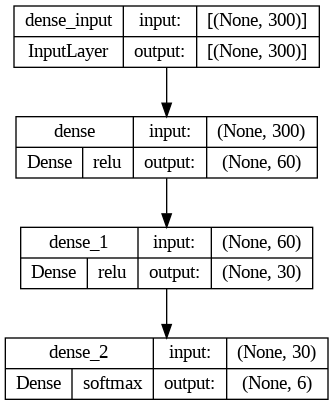

In [44]:
plot_model(ann, show_shapes=True,show_layer_names=True,show_layer_activations=True)

In [45]:
# Callback to stop training early after reaching a certain value for the validation loss
# Patience=3: Stop training if val_loss has not improved in 3 epochs
early_stop = EarlyStopping(monitor='val_loss', patience=3) 
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.000001)

In [46]:
class_weight = {0: 1.70, 1: 1.38, 2: 0.63, 3: 1.01, 4: 3.20, 5: 0.55}
history =ann.fit(X_train, y_train,validation_split=0.2, verbose=1, epochs=30, batch_size=32, class_weight=class_weight,callbacks=[early_stop, reduce_lr])

Epoch 1/30
53/53 [==============================] - 2s 11ms/step - loss: 1.7275 - accuracy: 0.2027 - val_loss: 1.7397 - val_accuracy: 0.2833 - lr: 0.0010
Epoch 2/30
53/53 [==============================] - 0s 5ms/step - loss: 1.6235 - accuracy: 0.3602 - val_loss: 1.6016 - val_accuracy: 0.4143 - lr: 0.0010
Epoch 3/30
53/53 [==============================] - 0s 4ms/step - loss: 1.4840 - accuracy: 0.4395 - val_loss: 1.4938 - val_accuracy: 0.4548 - lr: 0.0010
Epoch 4/30
53/53 [==============================] - 0s 5ms/step - loss: 1.3692 - accuracy: 0.4270 - val_loss: 1.4218 - val_accuracy: 0.4262 - lr: 0.0010
Epoch 5/30
53/53 [==============================] - 0s 5ms/step - loss: 1.2710 - accuracy: 0.4824 - val_loss: 1.3931 - val_accuracy: 0.4357 - lr: 0.0010
Epoch 6/30
53/53 [==============================] - 0s 4ms/step - loss: 1.1903 - accuracy: 0.4914 - val_loss: 1.3173 - val_accuracy: 0.4833 - lr: 0.0010
Epoch 7/30
53/53 [==============================] - 0s 4ms/step - loss: 1.1348 - 

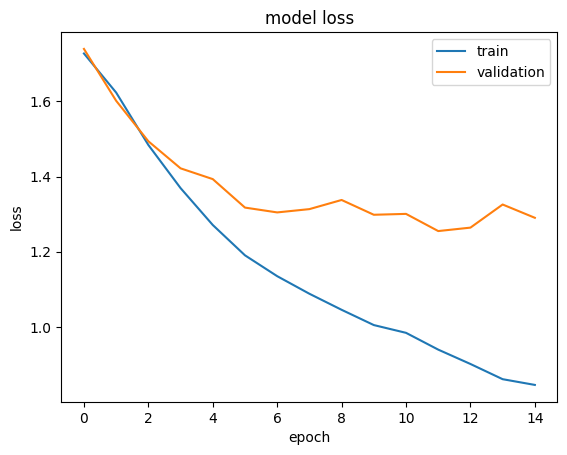

In [47]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

## **Metrics**

### **Confusion Metrics**

In [48]:
y_pred_ann=ann.predict(X_test)
y_pred_ann

17/17 [==============================] - 0s 2ms/step


array([[0.09416222, 0.50429314, 0.04990638, 0.24750826, 0.03196327,
        0.07216669],
       [0.40074897, 0.03929466, 0.19190626, 0.23211277, 0.04425819,
        0.09167928],
       [0.03430653, 0.51169527, 0.01511939, 0.23172061, 0.01773318,
        0.18942505],
       ...,
       [0.06480952, 0.29769698, 0.10866228, 0.1525224 , 0.01982139,
        0.35648745],
       [0.04848234, 0.21183166, 0.11405112, 0.12184791, 0.09171502,
        0.41207194],
       [0.01295536, 0.00505805, 0.6776882 , 0.0487218 , 0.02204537,
        0.23353116]], dtype=float32)

In [49]:
y_pred_ann_class=np.argmax(y_pred_ann,axis=1)
y_pred_ann_class

array([1, 0, 1, 5, 2, 1, 1, 0, 2, 3, 0, 2, 4, 2, 3, 4, 4, 4, 5, 2, 2, 2,
       0, 3, 5, 3, 4, 4, 2, 5, 0, 4, 0, 2, 3, 4, 0, 3, 5, 1, 3, 5, 5, 2,
       0, 3, 2, 2, 1, 5, 5, 5, 3, 3, 4, 4, 1, 2, 0, 0, 1, 2, 4, 1, 1, 4,
       2, 4, 3, 2, 5, 2, 0, 0, 1, 1, 2, 0, 1, 2, 1, 5, 1, 2, 4, 1, 1, 2,
       4, 3, 4, 3, 5, 5, 2, 3, 0, 2, 2, 2, 5, 1, 2, 2, 5, 2, 0, 2, 2, 1,
       4, 1, 2, 5, 2, 4, 2, 4, 2, 3, 3, 1, 5, 5, 1, 2, 1, 4, 4, 5, 5, 5,
       5, 3, 4, 1, 2, 2, 4, 2, 2, 1, 0, 3, 4, 1, 4, 3, 5, 2, 1, 4, 2, 2,
       2, 1, 2, 2, 5, 4, 2, 2, 2, 2, 3, 0, 1, 1, 2, 2, 2, 2, 2, 0, 1, 2,
       4, 3, 2, 0, 5, 1, 0, 4, 5, 2, 4, 2, 4, 0, 5, 2, 3, 2, 5, 1, 2, 2,
       1, 4, 1, 4, 0, 2, 1, 4, 4, 2, 1, 5, 0, 1, 5, 4, 0, 4, 5, 4, 5, 2,
       2, 4, 2, 3, 3, 2, 2, 5, 0, 2, 3, 0, 4, 3, 3, 5, 0, 0, 2, 0, 2, 2,
       0, 3, 2, 0, 3, 3, 5, 1, 4, 4, 4, 2, 4, 0, 5, 1, 5, 5, 1, 0, 2, 0,
       0, 2, 3, 2, 1, 4, 2, 2, 2, 3, 3, 3, 4, 1, 2, 2, 2, 2, 0, 1, 3, 2,
       3, 4, 2, 1, 4, 2, 2, 2, 2, 4, 4, 2, 1, 1, 2,

In [50]:
y_test_ann_class = np.argmax(y_test, axis=1)
confusion_matrix(y_test_ann_class, y_pred_ann_class)

array([[31,  3,  6,  4, 10,  4],
       [ 3, 40,  4,  6,  6,  3],
       [ 5,  9, 99, 11,  6, 10],
       [11, 11, 16, 22, 11,  9],
       [ 1,  2,  2,  3, 20,  1],
       [20, 10, 47, 17, 18, 44]])

### **Classification report**

In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test_ann_class, y_pred_ann_class))

              precision    recall  f1-score   support

           0       0.44      0.53      0.48        58
           1       0.53      0.65      0.58        62
           2       0.57      0.71      0.63       140
           3       0.35      0.28      0.31        80
           4       0.28      0.69      0.40        29
           5       0.62      0.28      0.39       156

    accuracy                           0.49       525
   macro avg       0.46      0.52      0.47       525
weighted avg       0.52      0.49      0.47       525



# **Model-DNN**

In [52]:
# Define DNN Model
dnn = keras.Sequential()
dnn.add(Dense(60, input_shape=(300,), activation='relu',kernel_regularizer=l2(0.001)))
dnn.add(Dropout(0.3))
# dnn.add(Dense(50,activation='relu',kernel_regularizer=l2(0.001)))
# dnn.add(Dropout(0.3))
# dnn.add(Dense(40,activation='relu',kernel_regularizer=l2(0.001)))
# dnn.add(Dropout(0.3))
# dnn.add(Dense(30,activation='relu',kernel_regularizer=l2(0.001)))
# dnn.add(Dropout(0.35))
dnn.add(Dense(30,activation='relu',kernel_regularizer=l2(0.001)))
dnn.add(Dropout(0.45))
dnn.add(Dense(20,activation='relu',kernel_regularizer=l2(0.001)))
dnn.add(Dropout(0.3))
dnn.add(Dense(6,activation='softmax'))
dnn.compile(optimizer ="Adam", loss="categorical_crossentropy", metrics = ["accuracy"])
dnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 60)                18060     
                                                                 
 dropout (Dropout)           (None, 60)                0         
                                                                 
 dense_4 (Dense)             (None, 30)                1830      
                                                                 
 dropout_1 (Dropout)         (None, 30)                0         
                                                                 
 dense_5 (Dense)             (None, 20)                620       
                                                                 
 dropout_2 (Dropout)         (None, 20)                0         
                                                                 
 dense_6 (Dense)             (None, 6)                

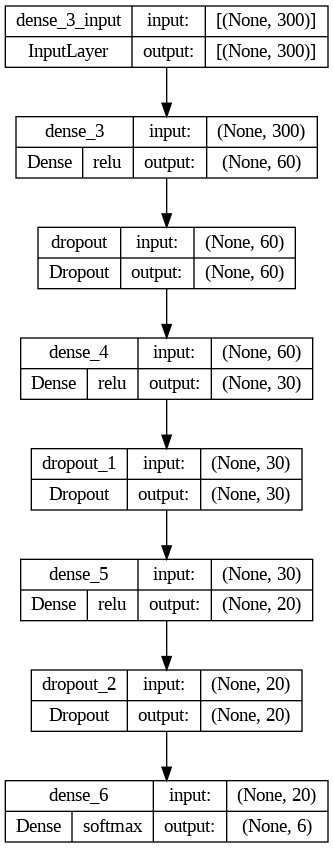

In [53]:
plot_model(dnn, show_shapes=True,show_layer_names=True,show_layer_activations=True)

In [54]:
class_weight = {0: 1.70, 1: 1.38, 2: 0.63, 3: 1.01, 4: 3.20, 5: 0.55}
history1 =dnn.fit(X_train, y_train, validation_split=0.2, verbose=1, epochs=50, batch_size=32,class_weight=class_weight,callbacks=[early_stop, reduce_lr])

Epoch 1/50
53/53 [==============================] - 2s 15ms/step - loss: 1.9002 - accuracy: 0.1735 - val_loss: 1.9168 - val_accuracy: 0.2452 - lr: 0.0010
Epoch 2/50
53/53 [==============================] - 0s 6ms/step - loss: 1.8674 - accuracy: 0.1956 - val_loss: 1.8828 - val_accuracy: 0.2857 - lr: 0.0010
Epoch 3/50
53/53 [==============================] - 0s 8ms/step - loss: 1.8228 - accuracy: 0.2499 - val_loss: 1.8198 - val_accuracy: 0.3405 - lr: 0.0010
Epoch 4/50
53/53 [==============================] - 0s 7ms/step - loss: 1.7742 - accuracy: 0.2964 - val_loss: 1.7696 - val_accuracy: 0.4048 - lr: 0.0010
Epoch 5/50
53/53 [==============================] - 0s 8ms/step - loss: 1.7433 - accuracy: 0.3214 - val_loss: 1.7194 - val_accuracy: 0.3857 - lr: 0.0010
Epoch 6/50
53/53 [==============================] - 0s 7ms/step - loss: 1.6950 - accuracy: 0.3333 - val_loss: 1.6464 - val_accuracy: 0.3905 - lr: 0.0010
Epoch 7/50
53/53 [==============================] - 0s 5ms/step - loss: 1.6529 - 

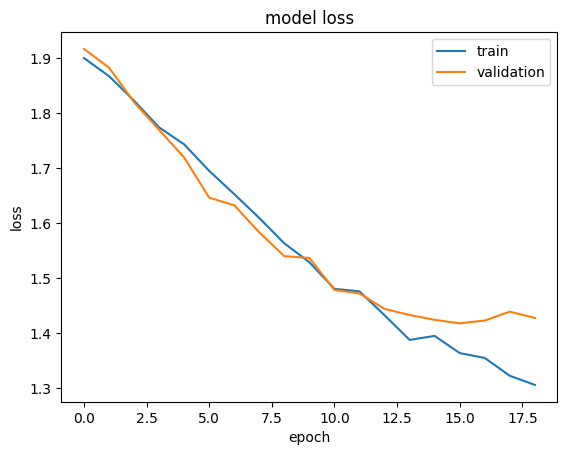

In [55]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

## **Metrics**

### **Confusion Metrics**

In [56]:
y_pred_dnn=dnn.predict(X_test)
y_pred_dnn

17/17 [==============================] - 0s 2ms/step


array([[0.11135918, 0.3072985 , 0.06264037, 0.27322778, 0.09896998,
        0.14650416],
       [0.3393513 , 0.04950671, 0.12196599, 0.23660551, 0.05381709,
        0.19875333],
       [0.1386297 , 0.2971454 , 0.0516419 , 0.2754257 , 0.09309507,
        0.14406218],
       ...,
       [0.1524795 , 0.09157095, 0.18078615, 0.2588364 , 0.07134099,
        0.244986  ],
       [0.20160744, 0.08930856, 0.1416164 , 0.24236012, 0.10544014,
        0.21966739],
       [0.04789122, 0.00547047, 0.51137465, 0.07353944, 0.05744975,
        0.3042745 ]], dtype=float32)

In [57]:
y_pred_dnn_class=np.argmax(y_pred_dnn,axis=1)
y_pred_dnn_class

array([1, 0, 1, 2, 2, 1, 1, 0, 2, 4, 0, 2, 5, 2, 3, 4, 4, 4, 5, 2, 2, 5,
       0, 2, 0, 4, 4, 4, 2, 2, 3, 4, 0, 5, 1, 4, 0, 3, 3, 1, 3, 4, 5, 2,
       0, 1, 2, 2, 1, 2, 4, 5, 3, 3, 2, 4, 1, 2, 5, 0, 1, 2, 4, 1, 4, 4,
       2, 4, 0, 2, 4, 2, 0, 0, 1, 1, 2, 0, 3, 2, 1, 2, 3, 2, 4, 3, 1, 2,
       4, 3, 4, 2, 2, 2, 2, 2, 0, 4, 5, 2, 4, 3, 5, 2, 2, 5, 5, 3, 2, 1,
       4, 1, 2, 0, 2, 5, 2, 4, 4, 2, 5, 1, 2, 0, 1, 2, 1, 4, 4, 2, 4, 4,
       0, 1, 4, 1, 2, 2, 4, 2, 2, 1, 0, 3, 4, 1, 4, 3, 4, 2, 1, 4, 2, 2,
       2, 4, 2, 2, 4, 4, 2, 2, 4, 3, 3, 0, 1, 1, 2, 2, 5, 5, 2, 0, 1, 2,
       4, 3, 2, 0, 5, 1, 0, 1, 4, 2, 4, 2, 4, 0, 2, 2, 3, 2, 0, 1, 2, 5,
       1, 4, 1, 4, 0, 3, 1, 4, 4, 2, 1, 0, 0, 1, 1, 4, 3, 2, 2, 4, 2, 5,
       2, 4, 5, 3, 3, 2, 2, 2, 0, 2, 5, 0, 4, 3, 3, 2, 5, 0, 2, 4, 2, 2,
       0, 3, 2, 0, 4, 0, 1, 3, 4, 4, 4, 3, 4, 0, 0, 1, 2, 4, 1, 0, 2, 0,
       0, 2, 3, 2, 1, 4, 2, 2, 2, 1, 0, 3, 4, 1, 2, 2, 2, 2, 0, 1, 3, 2,
       3, 4, 2, 1, 4, 2, 2, 2, 2, 4, 4, 4, 1, 1, 2,

In [58]:
y_test_dnn_class = np.argmax(y_test, axis=1)
confusion_matrix(y_test_dnn_class, y_pred_dnn_class)

array([[ 32,   3,   5,   4,  11,   3],
       [  3,  38,   2,   6,  11,   2],
       [  7,   6, 101,  10,   9,   7],
       [ 16,  10,  11,  21,  14,   8],
       [  0,   2,   0,   1,  26,   0],
       [ 25,  11,  61,  17,  27,  15]])

### **Classification report**

In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test_dnn_class, y_pred_dnn_class))

              precision    recall  f1-score   support

           0       0.39      0.55      0.45        58
           1       0.54      0.61      0.58        62
           2       0.56      0.72      0.63       140
           3       0.36      0.26      0.30        80
           4       0.27      0.90      0.41        29
           5       0.43      0.10      0.16       156

    accuracy                           0.44       525
   macro avg       0.42      0.52      0.42       525
weighted avg       0.45      0.44      0.40       525



# **Model-BLSTM**

In [60]:
#Define Model Bi-directional 
blstm = keras.Sequential()
blstm.add(Bidirectional(LSTM(60, return_sequences = True), input_shape = (X_train.shape[1], 1)))
blstm.add(Bidirectional(LSTM(10)))
blstm.add(Dense(6, activation ='softmax'))
blstm.compile(optimizer ="Adam", loss="categorical_crossentropy", metrics = ["accuracy"])

In [61]:
blstm.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 300, 120)         29760     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 20)               10480     
 nal)                                                            
                                                                 
 dense_7 (Dense)             (None, 6)                 126       
                                                                 
Total params: 40,366
Trainable params: 40,366
Non-trainable params: 0
_________________________________________________________________


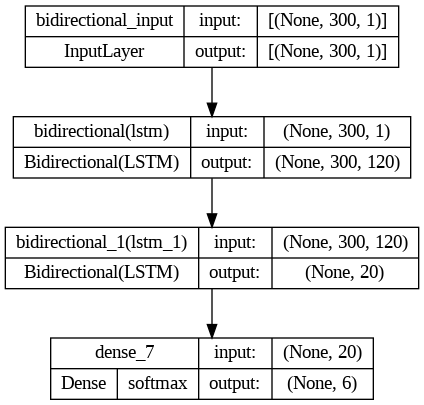

In [62]:
plot_model(blstm, show_shapes=True,show_layer_names=True,show_layer_activations=True)

In [63]:
class_weight = {0: 1.70, 1: 1.38, 2: 0.63, 3: 1.01, 4: 3.20, 5: 0.55}
history2 =blstm.fit(X_train, y_train, validation_split=0.2, verbose=1, epochs=30, batch_size=32,class_weight=class_weight,callbacks=[early_stop, reduce_lr])

Epoch 1/30
53/53 [==============================] - 40s 566ms/step - loss: 1.7527 - accuracy: 0.2475 - val_loss: 1.7906 - val_accuracy: 0.1190 - lr: 0.0010
Epoch 2/30
53/53 [==============================] - 30s 560ms/step - loss: 1.7515 - accuracy: 0.1878 - val_loss: 1.7832 - val_accuracy: 0.1738 - lr: 0.0010
Epoch 3/30
53/53 [==============================] - 29s 541ms/step - loss: 1.7497 - accuracy: 0.2713 - val_loss: 1.7810 - val_accuracy: 0.1357 - lr: 0.0010
Epoch 4/30
53/53 [==============================] - 28s 537ms/step - loss: 1.7700 - accuracy: 0.1789 - val_loss: 1.7695 - val_accuracy: 0.2929 - lr: 0.0010
Epoch 5/30
53/53 [==============================] - 28s 524ms/step - loss: 1.7463 - accuracy: 0.2516 - val_loss: 1.7746 - val_accuracy: 0.2071 - lr: 0.0010
Epoch 6/30
53/53 [==============================] - 31s 582ms/step - loss: 1.7552 - accuracy: 0.1992 - val_loss: 1.7569 - val_accuracy: 0.2667 - lr: 0.0010
Epoch 7/30
53/53 [==============================] - 27s 518ms/st

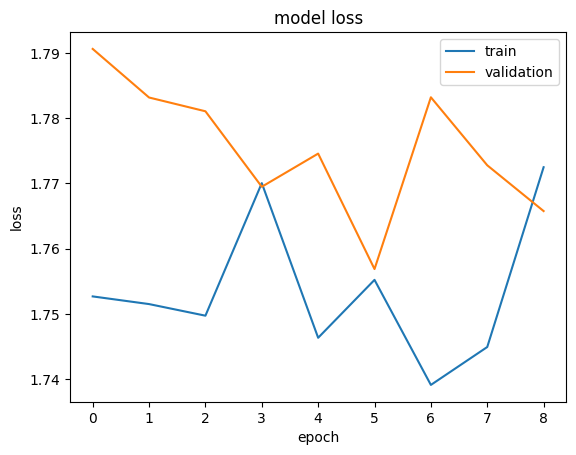

In [64]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

## **Metrics**

### **Confusion Metrics**

In [65]:
y_pred_blstm=blstm.predict(X_test)
y_pred_blstm

17/17 [==============================] - 4s 140ms/step


array([[0.16801964, 0.15377861, 0.1899957 , 0.20123214, 0.13061813,
        0.15635571],
       [0.16885029, 0.14711988, 0.19714919, 0.19761518, 0.13105273,
        0.1582127 ],
       [0.16943233, 0.1527857 , 0.18977673, 0.19971158, 0.12940912,
        0.15888466],
       ...,
       [0.16780429, 0.15075417, 0.1909116 , 0.20069511, 0.13014689,
        0.15968797],
       [0.16905035, 0.15387592, 0.18646656, 0.20134984, 0.12829597,
        0.16096129],
       [0.16895647, 0.14042138, 0.20244429, 0.19502191, 0.13070036,
        0.16245551]], dtype=float32)

In [66]:
y_pred_blstm_class=np.argmax(y_pred_blstm,axis=1)
y_pred_blstm_class

array([3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2,
       3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 2, 3, 2, 2, 3, 2, 3, 2, 3, 2, 3, 3, 2, 3, 3, 3, 2, 2, 3, 3,
       2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 2, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2,
       2, 3, 2, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3,
       2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2,
       3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3,
       2, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 2,
       3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 3, 3, 3,
       3, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3,

In [67]:
y_test_blstm_class = np.argmax(y_test, axis=1)
confusion_matrix(y_test_blstm_class, y_pred_blstm_class)

array([[  0,   0,  14,  44,   0,   0],
       [  0,   0,  12,  49,   0,   1],
       [  0,   0,  35, 104,   0,   1],
       [  0,   0,  16,  63,   0,   1],
       [  0,   0,   8,  21,   0,   0],
       [  0,   0,  30, 126,   0,   0]])

### **Classification report**

In [68]:
from sklearn.metrics import classification_report
print(classification_report(y_test_blstm_class, y_pred_blstm_class))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        58
           1       0.00      0.00      0.00        62
           2       0.30      0.25      0.27       140
           3       0.15      0.79      0.26        80
           4       0.00      0.00      0.00        29
           5       0.00      0.00      0.00       156

    accuracy                           0.19       525
   macro avg       0.08      0.17      0.09       525
weighted avg       0.10      0.19      0.11       525



# **Model SL-CNN**

In [69]:
# Define SL CNN Model
slcnn = keras.Sequential()
# slcnn.add(layers.Conv1D(128, 5, activation='relu'))
slcnn.add(layers.Conv1D(filters=64, kernel_size=4, padding='same',input_shape=(X_train.shape[1], 1), activation='relu'))
slcnn.add(MaxPooling1D(pool_size=2))
# slcnn.add(layers.GlobalMaxPooling1D())
#Flatten
slcnn.add(Flatten())
slcnn.add(Dense(20, activation='relu'))
slcnn.add(Dense(6, activation='softmax'))
slcnn.compile(optimizer ="Adam", loss="categorical_crossentropy", metrics = ["accuracy"])
slcnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 300, 64)           320       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 150, 64)          0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 9600)              0         
                                                                 
 dense_8 (Dense)             (None, 20)                192020    
                                                                 
 dense_9 (Dense)             (None, 6)                 126       
                                                                 
Total params: 192,466
Trainable params: 192,466
Non-trainable params: 0
________________________________________________

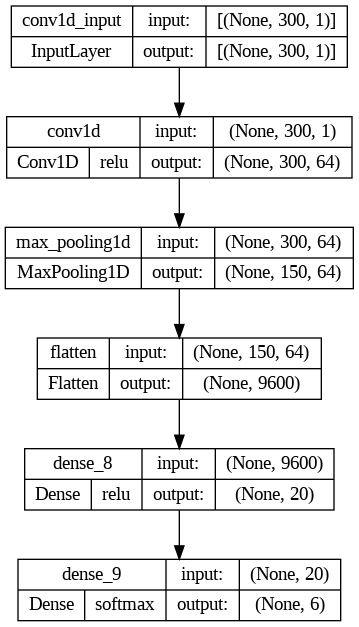

In [70]:
plot_model(slcnn, show_shapes=True,show_layer_names=True,show_layer_activations=True)

In [71]:
class_weight = {0: 1.70, 1: 1.38, 2: 0.63, 3: 1.01, 4: 3.20, 5: 0.55}
history3 =slcnn.fit(X_train, y_train, validation_split=0.2, verbose=1, epochs=30, batch_size=32,class_weight=class_weight,callbacks=[early_stop, reduce_lr])

Epoch 1/30
53/53 [==============================] - 2s 25ms/step - loss: 1.7404 - accuracy: 0.2832 - val_loss: 1.7447 - val_accuracy: 0.2905 - lr: 0.0010
Epoch 2/30
53/53 [==============================] - 1s 18ms/step - loss: 1.6800 - accuracy: 0.3393 - val_loss: 1.6601 - val_accuracy: 0.3071 - lr: 0.0010
Epoch 3/30
53/53 [==============================] - 1s 18ms/step - loss: 1.5802 - accuracy: 0.3858 - val_loss: 1.5468 - val_accuracy: 0.4024 - lr: 0.0010
Epoch 4/30
53/53 [==============================] - 1s 19ms/step - loss: 1.4708 - accuracy: 0.4377 - val_loss: 1.4949 - val_accuracy: 0.4381 - lr: 0.0010
Epoch 5/30
53/53 [==============================] - 2s 31ms/step - loss: 1.3761 - accuracy: 0.4556 - val_loss: 1.4444 - val_accuracy: 0.4405 - lr: 0.0010
Epoch 6/30
53/53 [==============================] - 2s 31ms/step - loss: 1.2860 - accuracy: 0.4830 - val_loss: 1.3828 - val_accuracy: 0.4762 - lr: 0.0010
Epoch 7/30
53/53 [==============================] - 1s 20ms/step - loss: 1.2

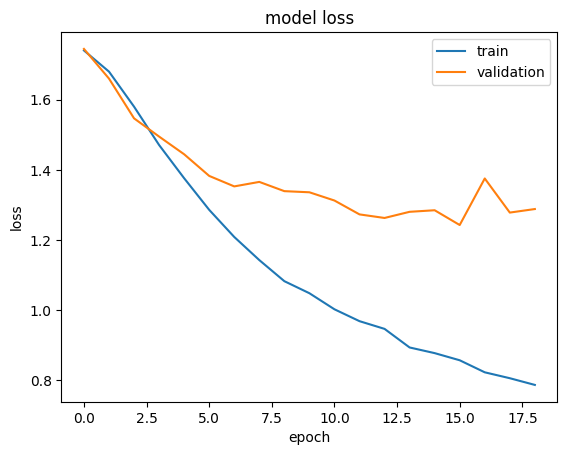

In [72]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

## **Metrics**

### **Confusion Metrics**

In [73]:
y_pred_slcnn=slcnn.predict(X_test)
y_pred_slcnn

17/17 [==============================] - 0s 5ms/step


array([[0.04988592, 0.3684443 , 0.02317303, 0.46370995, 0.00405849,
        0.09072835],
       [0.49548247, 0.04375201, 0.07714012, 0.27614972, 0.01432912,
        0.09314658],
       [0.03595354, 0.60275656, 0.00077638, 0.2368813 , 0.00190635,
        0.12172586],
       ...,
       [0.0852835 , 0.2587741 , 0.02113161, 0.30880898, 0.00498573,
        0.32101613],
       [0.09252114, 0.47617412, 0.03371964, 0.14535078, 0.00496917,
        0.24726515],
       [0.03904932, 0.01140984, 0.69860023, 0.05701224, 0.02298206,
        0.17094631]], dtype=float32)

In [74]:
y_pred_slcnn_class=np.argmax(y_pred_slcnn,axis=1)
y_pred_slcnn_class

array([3, 0, 1, 5, 2, 1, 1, 0, 2, 3, 0, 2, 2, 2, 3, 4, 4, 1, 3, 2, 2, 3,
       0, 3, 5, 3, 3, 4, 0, 0, 3, 4, 0, 2, 3, 4, 0, 0, 3, 1, 3, 3, 0, 2,
       3, 3, 2, 2, 1, 5, 5, 3, 3, 3, 4, 3, 1, 4, 0, 0, 1, 2, 5, 1, 1, 3,
       2, 5, 1, 2, 5, 2, 5, 0, 1, 1, 2, 0, 3, 2, 1, 5, 5, 2, 4, 1, 1, 2,
       4, 3, 4, 2, 2, 4, 2, 3, 0, 2, 3, 3, 4, 3, 3, 2, 5, 2, 5, 3, 2, 1,
       4, 1, 2, 0, 2, 2, 2, 4, 2, 3, 2, 1, 5, 1, 1, 3, 1, 4, 3, 5, 1, 5,
       5, 1, 4, 3, 2, 5, 4, 2, 2, 1, 0, 0, 4, 1, 4, 2, 5, 2, 1, 2, 2, 2,
       2, 1, 2, 2, 1, 4, 2, 2, 2, 5, 3, 0, 1, 1, 2, 2, 3, 3, 2, 0, 3, 2,
       4, 3, 2, 0, 5, 1, 0, 1, 1, 2, 1, 2, 4, 0, 2, 2, 3, 2, 5, 1, 2, 2,
       1, 4, 1, 4, 0, 2, 1, 1, 4, 2, 1, 3, 2, 1, 1, 3, 3, 2, 5, 2, 0, 0,
       2, 4, 2, 3, 3, 2, 2, 5, 0, 2, 3, 0, 4, 3, 3, 5, 0, 0, 2, 3, 2, 2,
       3, 3, 2, 1, 3, 3, 1, 1, 0, 4, 3, 3, 4, 0, 3, 1, 5, 1, 1, 0, 2, 0,
       3, 0, 3, 2, 1, 3, 2, 2, 2, 1, 3, 3, 4, 1, 2, 2, 2, 0, 0, 1, 3, 2,
       3, 4, 2, 1, 3, 2, 2, 2, 2, 4, 4, 3, 1, 1, 2,

In [75]:
y_test_slcnn_class = np.argmax(y_test, axis=1)
confusion_matrix(y_test_slcnn_class, y_pred_slcnn_class)

array([[29,  6,  8,  8,  6,  1],
       [ 2, 43,  3, 10,  0,  4],
       [ 7, 11, 99, 14,  3,  6],
       [11,  7, 11, 42,  7,  2],
       [ 0,  3,  2,  3, 19,  2],
       [23, 19, 43, 24, 15, 32]])

### **Classification report**

In [76]:
from sklearn.metrics import classification_report
print(classification_report(y_test_slcnn_class, y_pred_slcnn_class))

              precision    recall  f1-score   support

           0       0.40      0.50      0.45        58
           1       0.48      0.69      0.57        62
           2       0.60      0.71      0.65       140
           3       0.42      0.53      0.46        80
           4       0.38      0.66      0.48        29
           5       0.68      0.21      0.32       156

    accuracy                           0.50       525
   macro avg       0.49      0.55      0.49       525
weighted avg       0.55      0.50      0.48       525



# **Model ML-CNN**

In [77]:
# Define ML CNN Model
mlcnn = keras.Sequential()
mlcnn.add(layers.Conv1D(filters=64, kernel_size=4, padding='same',input_shape=(X_train.shape[1], 1), activation='relu'))
mlcnn.add(MaxPooling1D(pool_size=2))
mlcnn.add(layers.Conv1D(filters=64, kernel_size=4, padding='same', activation='relu'))
mlcnn.add(MaxPooling1D(pool_size=2))
# slcnn.add(layers.GlobalMaxPooling1D())
#Flatten
mlcnn.add(Flatten())
mlcnn.add(Dense(20, activation='relu'))
mlcnn.add(Dense(6, activation='softmax'))
mlcnn.compile(optimizer ="Adam", loss="categorical_crossentropy", metrics = ["accuracy"])
mlcnn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 300, 64)           320       
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 150, 64)          0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 150, 64)           16448     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 75, 64)           0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 4800)              0         
                                                                 
 dense_10 (Dense)            (None, 20)               

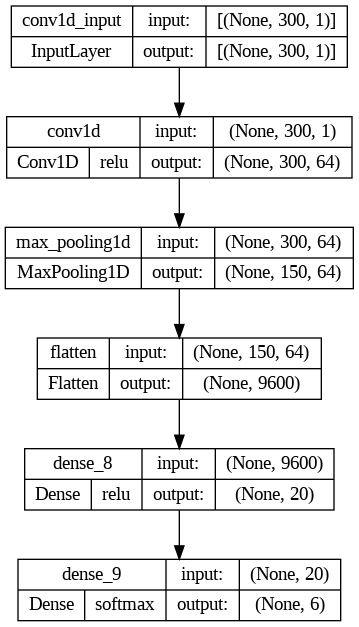

In [78]:
plot_model(slcnn, show_shapes=True,show_layer_names=True,show_layer_activations=True)

In [79]:
class_weight = {0: 1.70, 1: 1.38, 2: 0.63, 3: 1.01, 4: 3.20, 5: 0.55}
history4 =mlcnn.fit(X_train, y_train, validation_split=0.2, verbose=1, epochs=30, batch_size=32,class_weight=class_weight,callbacks=[early_stop, reduce_lr])

Epoch 1/30
53/53 [==============================] - 3s 43ms/step - loss: 1.7310 - accuracy: 0.2510 - val_loss: 1.7355 - val_accuracy: 0.2381 - lr: 0.0010
Epoch 2/30
53/53 [==============================] - 2s 36ms/step - loss: 1.6710 - accuracy: 0.3125 - val_loss: 1.6658 - val_accuracy: 0.3214 - lr: 0.0010
Epoch 3/30
53/53 [==============================] - 2s 32ms/step - loss: 1.6308 - accuracy: 0.3530 - val_loss: 1.6208 - val_accuracy: 0.3262 - lr: 0.0010
Epoch 4/30
53/53 [==============================] - 2s 37ms/step - loss: 1.5770 - accuracy: 0.3715 - val_loss: 1.5587 - val_accuracy: 0.3667 - lr: 0.0010
Epoch 5/30
53/53 [==============================] - 3s 59ms/step - loss: 1.5369 - accuracy: 0.3971 - val_loss: 1.5599 - val_accuracy: 0.3810 - lr: 0.0010
Epoch 6/30
53/53 [==============================] - 2s 35ms/step - loss: 1.4872 - accuracy: 0.4425 - val_loss: 1.5397 - val_accuracy: 0.4095 - lr: 0.0010
Epoch 7/30
53/53 [==============================] - 2s 32ms/step - loss: 1.4

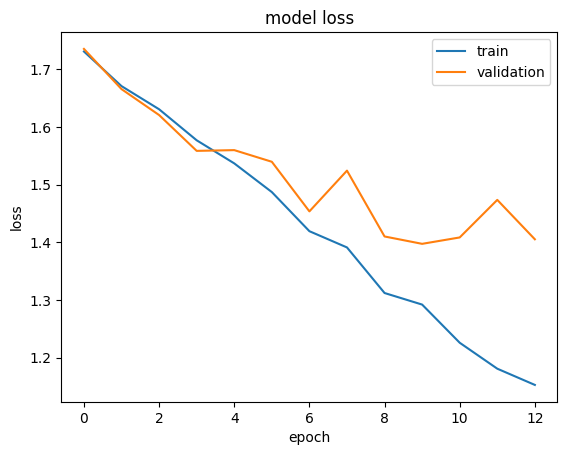

In [80]:
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

## **Metrics**

### **Confusion Metrics**

In [81]:
y_pred_mlcnn=mlcnn.predict(X_test)
y_pred_mlcnn

17/17 [==============================] - 0s 9ms/step


array([[0.04764478, 0.39355764, 0.05131399, 0.19538747, 0.10615391,
        0.20594214],
       [0.20186284, 0.08629487, 0.09796741, 0.15330496, 0.16128981,
        0.29928005],
       [0.21092422, 0.3529867 , 0.02822642, 0.12284535, 0.10220174,
        0.1828156 ],
       ...,
       [0.03261356, 0.4520555 , 0.04337567, 0.17958993, 0.09981737,
        0.19254792],
       [0.1898231 , 0.15222883, 0.06166599, 0.20717701, 0.07316687,
        0.31593826],
       [0.05052959, 0.00282375, 0.50029546, 0.14931215, 0.09074127,
        0.20629779]], dtype=float32)

In [82]:
y_pred_mlcnn_class=np.argmax(y_pred_mlcnn,axis=1)
y_pred_mlcnn_class

array([1, 5, 1, 5, 2, 1, 1, 2, 2, 4, 0, 2, 3, 5, 0, 4, 4, 1, 2, 2, 2, 3,
       0, 2, 4, 3, 1, 4, 2, 2, 3, 0, 0, 2, 3, 4, 0, 5, 3, 1, 1, 3, 0, 2,
       5, 1, 2, 5, 1, 5, 5, 3, 2, 3, 2, 0, 1, 2, 5, 0, 1, 5, 4, 1, 1, 1,
       2, 4, 5, 2, 5, 2, 5, 5, 1, 1, 2, 5, 1, 2, 1, 4, 3, 2, 4, 1, 1, 3,
       4, 3, 4, 3, 2, 2, 2, 3, 5, 4, 3, 3, 4, 5, 3, 2, 5, 3, 5, 3, 2, 3,
       2, 1, 2, 5, 2, 4, 3, 1, 2, 3, 3, 1, 2, 5, 1, 2, 1, 4, 0, 5, 1, 5,
       4, 1, 4, 1, 5, 5, 4, 2, 2, 1, 0, 5, 4, 1, 5, 2, 5, 2, 5, 4, 3, 5,
       5, 1, 2, 2, 1, 5, 5, 2, 2, 3, 5, 5, 1, 1, 2, 2, 2, 3, 2, 1, 1, 2,
       4, 5, 2, 0, 5, 3, 5, 1, 1, 2, 1, 5, 4, 5, 5, 3, 3, 5, 2, 1, 2, 5,
       1, 4, 1, 4, 0, 3, 1, 1, 4, 2, 1, 5, 5, 1, 1, 3, 3, 5, 5, 5, 0, 5,
       2, 4, 2, 3, 3, 5, 1, 5, 5, 2, 3, 5, 4, 1, 3, 5, 5, 0, 5, 4, 2, 5,
       1, 1, 2, 1, 5, 5, 1, 1, 0, 4, 4, 3, 4, 5, 3, 1, 5, 1, 3, 5, 3, 0,
       2, 2, 3, 2, 1, 3, 2, 2, 2, 3, 5, 3, 1, 1, 5, 2, 3, 5, 0, 1, 3, 2,
       3, 4, 2, 1, 2, 2, 2, 2, 2, 1, 4, 2, 1, 1, 2,

In [83]:
y_test_mlcnn_class = np.argmax(y_test, axis=1)
confusion_matrix(y_test_mlcnn_class, y_pred_mlcnn_class)

array([[19,  7,  4,  3,  7, 18],
       [ 1, 46,  1,  6,  5,  3],
       [ 1,  7, 78, 20,  5, 29],
       [ 3, 18, 15, 20,  8, 16],
       [ 0,  4,  3,  3, 16,  3],
       [10, 17, 32, 30, 15, 52]])

### **Classification report**

In [84]:
from sklearn.metrics import classification_report
print(classification_report(y_test_mlcnn_class, y_pred_mlcnn_class))

              precision    recall  f1-score   support

           0       0.56      0.33      0.41        58
           1       0.46      0.74      0.57        62
           2       0.59      0.56      0.57       140
           3       0.24      0.25      0.25        80
           4       0.29      0.55      0.38        29
           5       0.43      0.33      0.38       156

    accuracy                           0.44       525
   macro avg       0.43      0.46      0.43       525
weighted avg       0.45      0.44      0.44       525

